In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pylab as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [9]:
wdbc_ori =  pd.read_csv("data/wdbc.data", header = None)
wdbc = pd.read_csv("data/wdbc.data", header = None)
name_list = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
 'symmetry_mean','fractal dimension_mean','radius_se','texture_se','perimeter_se',
'area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
'symmetry_se','fractal dimension_se','radius_worst','texture_worst','perimeter_worst',
'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal dimension_worst']
wdbc.columns = name_list
wdbc_ori.columns = name_list
wdbc[name_list[2:]] = wdbc[name_list[2:]].astype(float)

wdbc = wdbc.drop(['id'],axis = 1)
wdbc.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Mlignant shape:  (212, 31)
Benign shape: (357, 31)


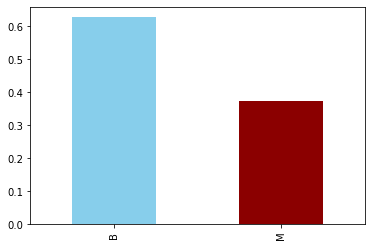

In [3]:
print("Mlignant shape: ", wdbc[wdbc['diagnosis'] == 'M'].shape)
print("Benign shape:" ,wdbc[wdbc['diagnosis'] == 'B'].shape)
y_frac = wdbc_ori['diagnosis'].value_counts()/wdbc_ori['diagnosis'].shape
y_frac.plot(kind='bar', stacked=True,color=("skyblue", "darkred"))
# plt.savefig('figures/target_barplot.png',dpi=300)
plt.show()

In [4]:
describe = wdbc.describe()
# describe = describe.drop("diagnosis",axis = 1)
describe
#describe.to_csv("describe.csv")

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [5]:
# Standard Data Scaling
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
wdbc[name_list[2:]] = scaler.fit_transform(wdbc[name_list[2:]])

# Label target variable
leb = LabelEncoder()
wdbc[["diagnosis"]] = leb.fit_transform(wdbc["diagnosis"])
wdbc.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293         2.303601   
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
3       2.867383  ...     -0.281464       0.133984        -0.249939   
4      -0.009560  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 31 columns]

In [6]:
#print (wdbc.dtypes)
wdbc.to_csv("wdbc_pro.csv")

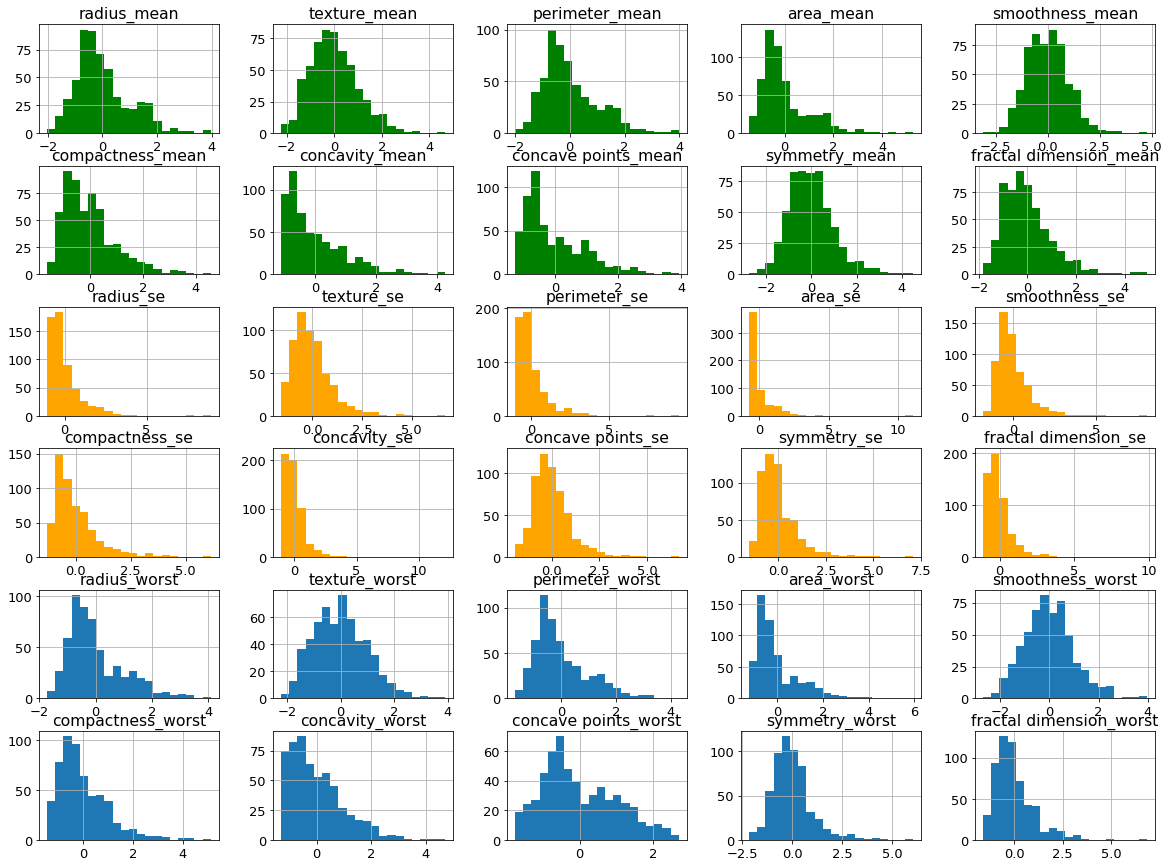

In [7]:
# histogram
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,15))
r = 0
c = 0
for var in name_list[2:]:
    if r < 2: 
        wdbc.hist(var,bins = 20, ax=axes[r,c], color = "green")
    elif 2<=r<4:
        wdbc.hist(var,bins = 20, ax=axes[r,c], color = "orange")
    elif r>=4:
        wdbc.hist(var,bins = 20, ax=axes[r,c])
    c += 1 
    if c>4:
        r += 1
        c = 0

In [8]:
wdbc.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293         2.303601   
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
3       2.867383  ...     -0.281464       0.133984        -0.249939   
4      -0.009560  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 31 columns]

In [9]:
# Draw histogram by target class

def hist_draw(df,col,lab):
    # fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,15))
    r = 0
    c = 0
    for var in name_list[2:]:
        if r == 0 and c == 0:
            df.hist(var,bins = 30, ax=axes[r,c], color = col,
                    alpha=0.6,label=lab)
        else:
            df.hist(var,bins = 30, ax=axes[r,c], color = col,
                    alpha=0.6)
        c += 1 
        if c>4:
            r += 1
            c = 0
    fig.legend(loc='center left')

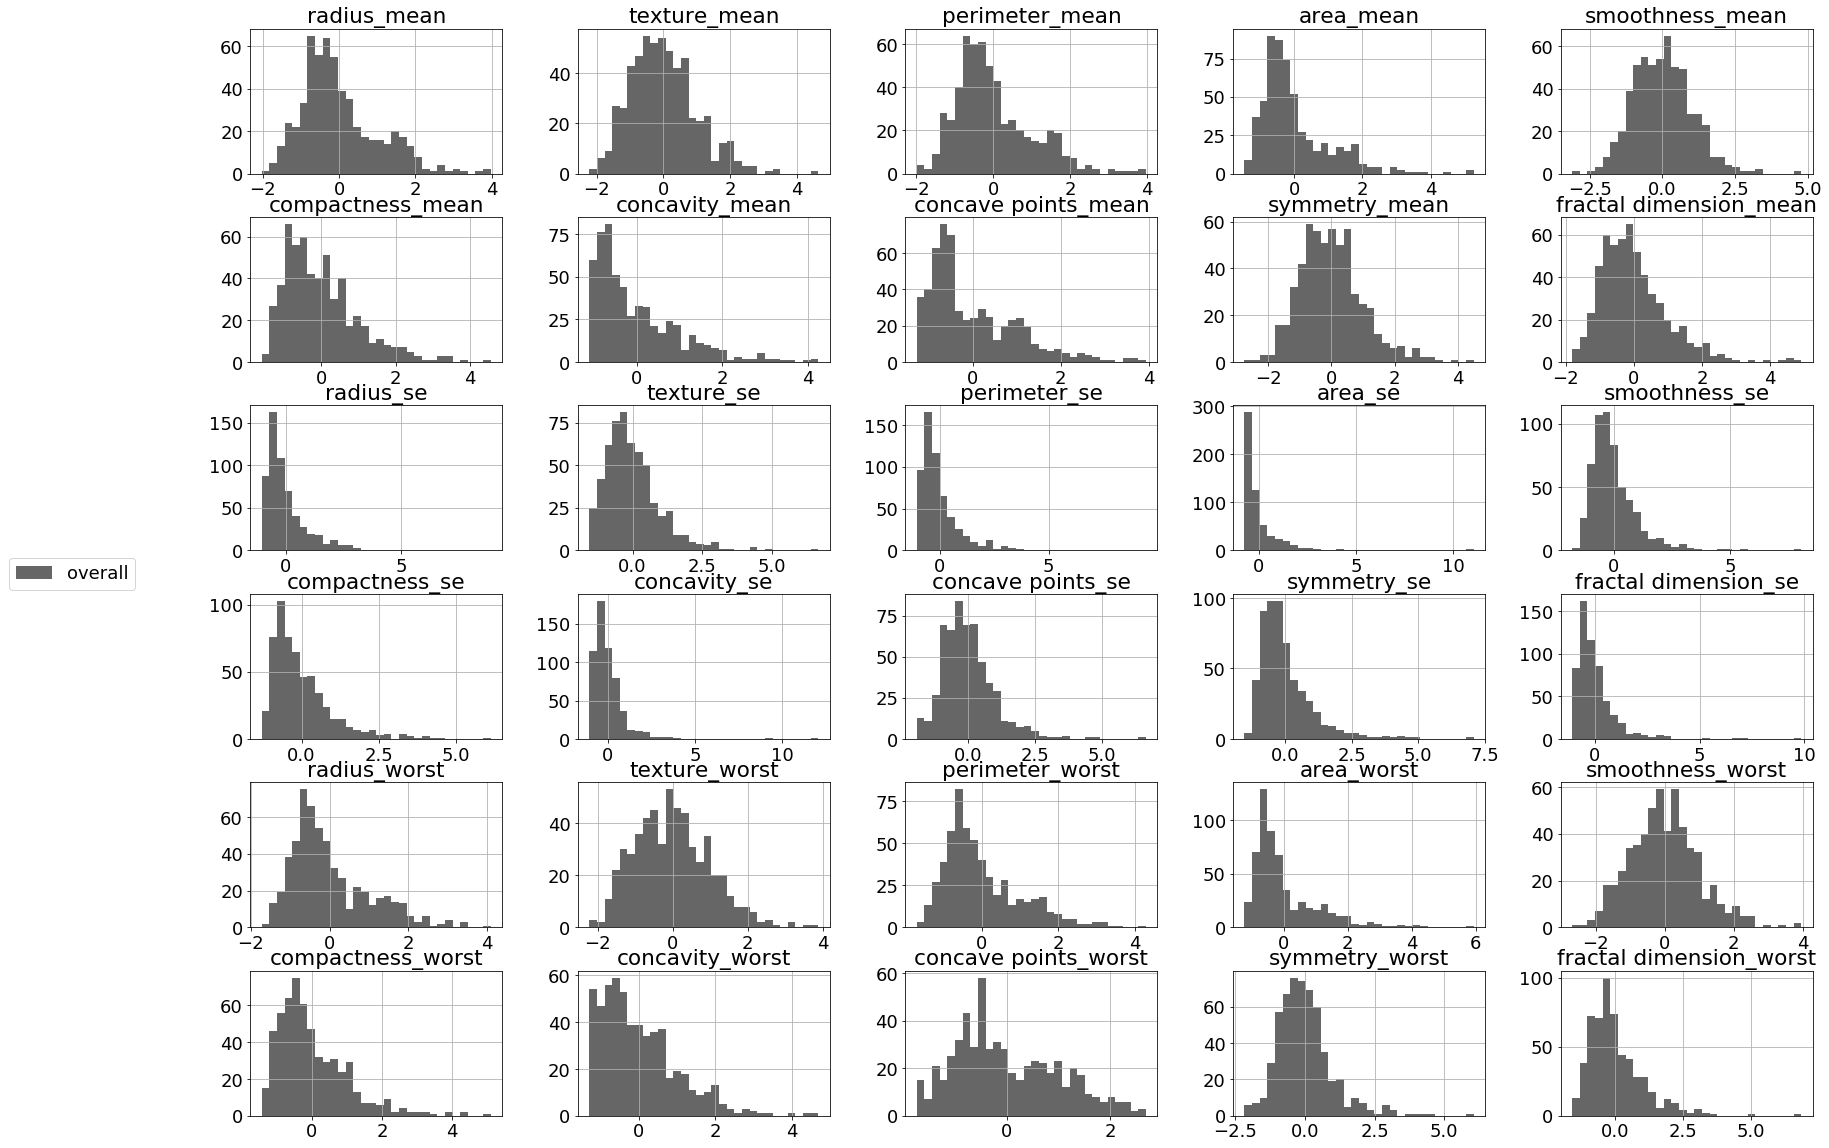

In [10]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(28,20))
hist_draw(wdbc,col = 'black',lab='overall')
plt.savefig('figures/overall_hist.png',dpi=300)

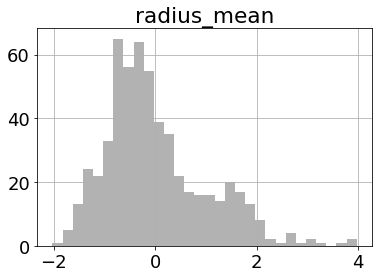

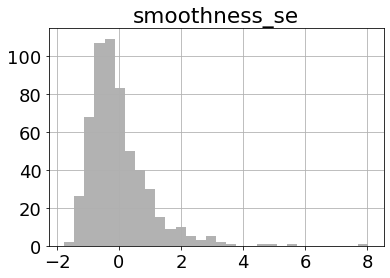

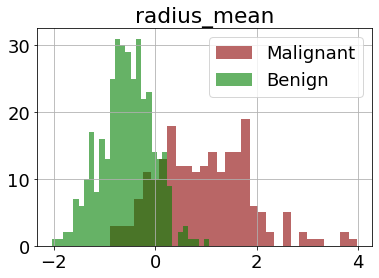

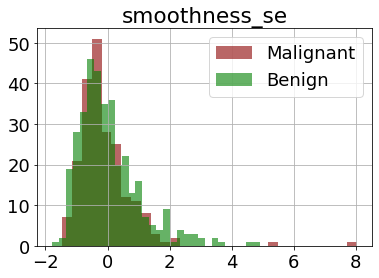

In [13]:
wdbc.hist("radius_mean",bins = 30,color = "grey",alpha=0.6)
plt.savefig('figures/radius_mean_hist.png',dpi=50)
plt.show()
wdbc.hist("smoothness_se",bins = 30,color = "grey",alpha=0.6)
plt.savefig('figures/smoothness_se_hist.png',dpi=50)
plt.show()

target_mali.hist("radius_mean",bins = 30,color = "darkred",alpha=0.6,label ='Malignant')
plt.hist(target_beni["radius_mean"],bins = 30,color = "green",alpha=0.6,label ='Benign')
plt.savefig('figures/radius_mean_separate.png',dpi=50)
plt.legend()

target_mali.hist("smoothness_se",bins = 30,color = "darkred",alpha=0.6,label ='Malignant')
plt.hist(target_beni["smoothness_se"],bins = 30,color = "green",alpha=0.6,label ='Benign')
plt.savefig('figures/smoothness_se_separate.png',dpi=50)
plt.legend()

In [12]:
target_mali = wdbc[wdbc['diagnosis']==1]
target_beni = wdbc[wdbc['diagnosis']==0]

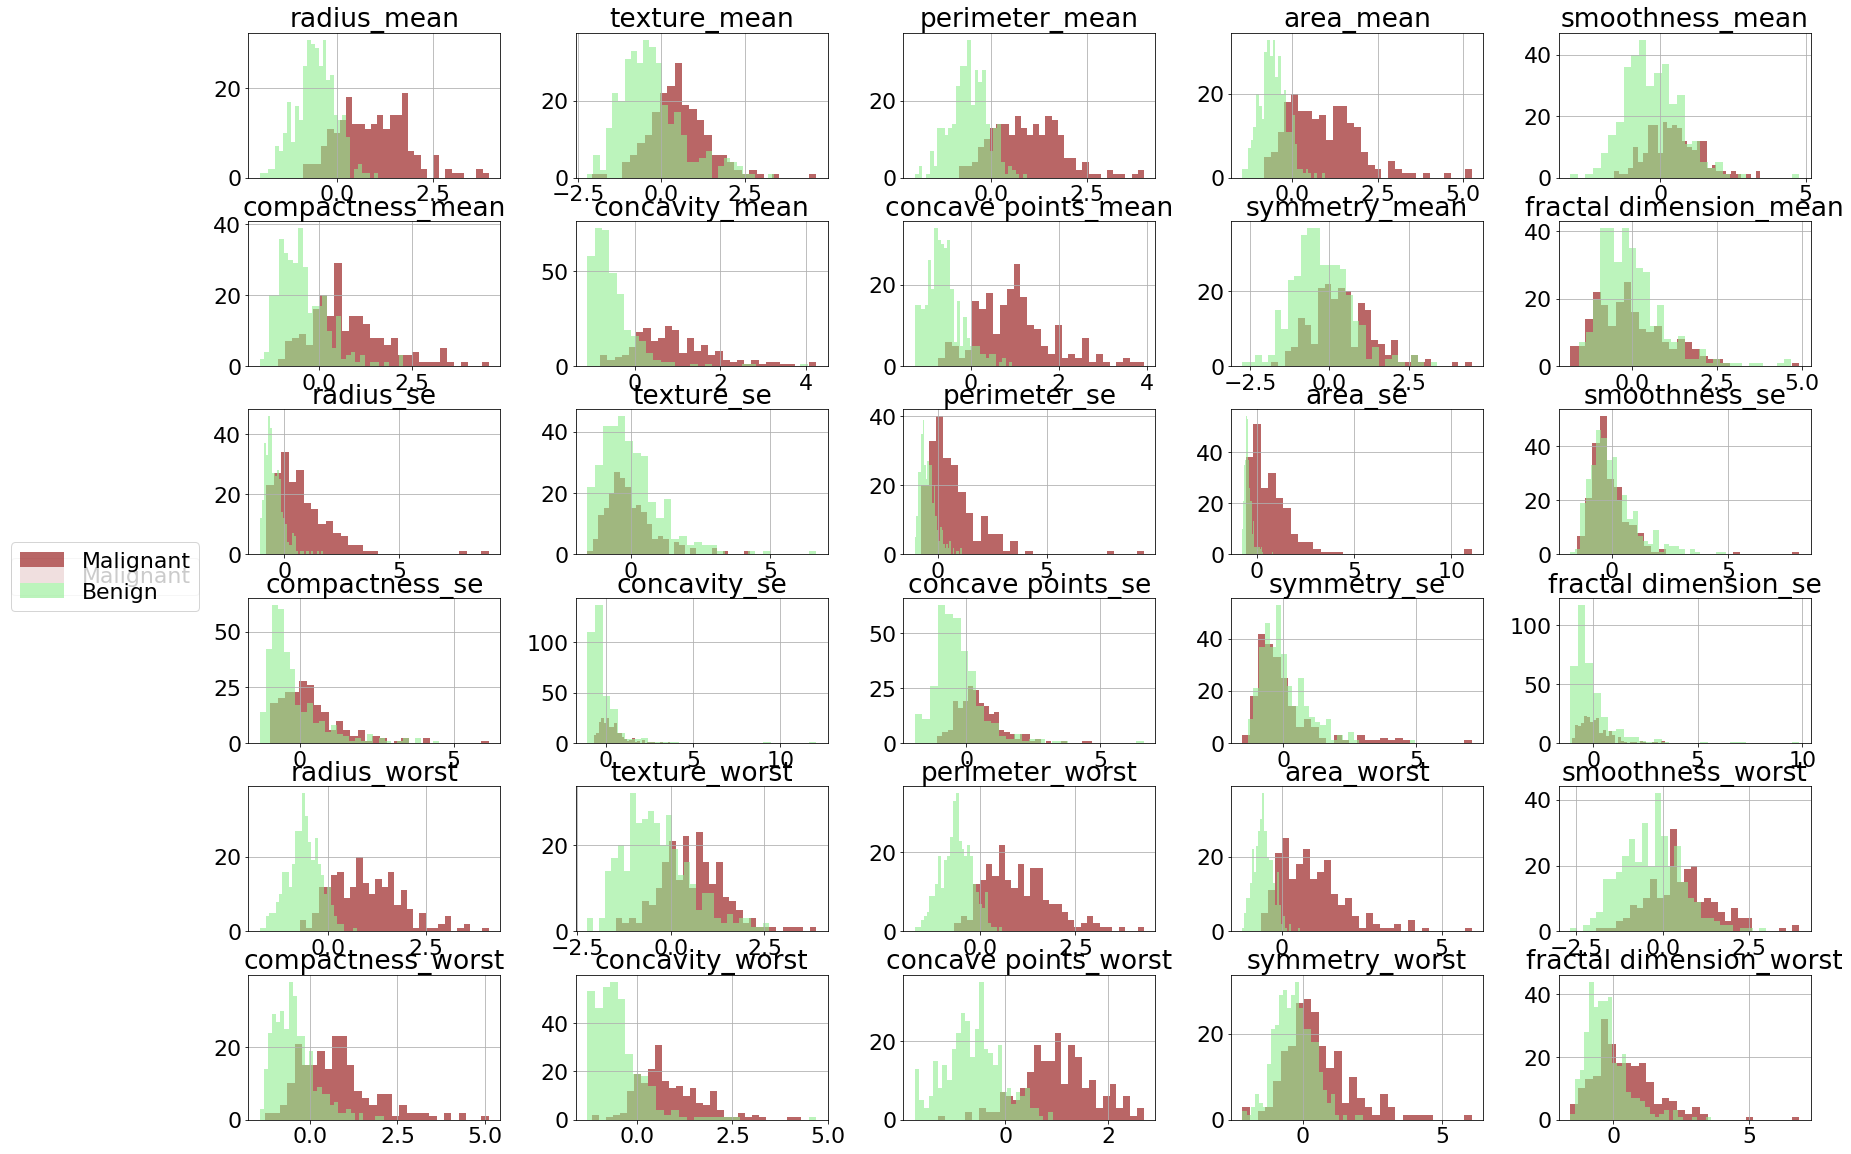

In [14]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(28,20))
hist_draw(target_mali,col = 'darkred',lab='Malignant')
hist_draw(target_beni,col = 'lightgreen',lab='Benign')
plt.savefig('figures/target_hist.png',dpi=300)

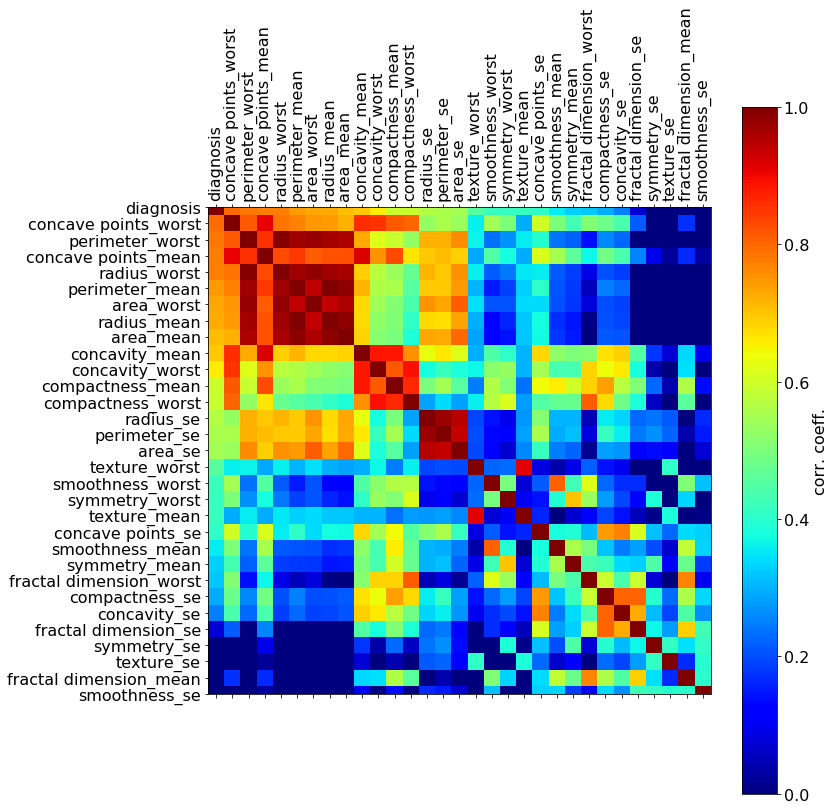

In [15]:
# Correlation Matrix and sorting based on target
# wdbc_X = wdbc.drop(["id","diagnosis"],axis=1)
corrmat = wdbc.corr()
plt.rcParams.update({'font.size': 16})
all_cols = corrmat.sort_values('diagnosis',ascending=False)['diagnosis'].index 
cols = all_cols
cm_order = corrmat.loc[cols,cols]

plt.figure(figsize=(12,12))
plt.matshow(cm_order,cmap='jet',fignum=0,vmin=0, vmax=1)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm_order.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm_order.shape[0]),list(cols))
plt.tight_layout()
plt.savefig('figures/corr_coeff.png',dpi=300)
plt.show()
plt.rcParams.update({'font.size': 10})

In [16]:
f_order = list(cm_order.index[1:])
f_order

wdbc_X = wdbc.drop(["diagnosis"],axis=1)
wdbc_Y = wdbc["diagnosis"]
f_test, p_values = f_classif(wdbc_X,wdbc_Y)
names = list(wdbc_X.columns)
f_temp = pd.DataFrame([f_test])
f_temp.columns = names
f_inorder = pd.DataFrame()
for feature in f_order:
    f_inorder[feature] = f_temp[feature]
f_inorder
# f_select = SelectKBest(f_classif,k=10)
# X_f = f_select.fit_transform(wdbc_X, wdbc_Y)
# f_result = f_select.get_support()
# f_result
# feature_names[f_result]

concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0            964.385393       897.944219            861.67602    860.781707   

   perimeter_mean  area_worst  radius_mean   area_mean  concavity_mean  \
0      697.235272  661.600206   646.981021  573.060747      533.793126   

   concavity_worst  ...  smoothness_mean  symmetry_mean  \
0       436.691939  ...        83.651123      69.527444   

   fractal dimension_worst  compactness_se  concavity_se  \
0                66.443961       53.247339     39.014482   

   fractal dimension_se  symmetry_se  texture_se  fractal dimension_mean  \
0              3.468275     0.024117    0.039095                0.093459   

   smoothness_se  
0       2.557968  

[1 rows x 30 columns]

In [17]:
mi = mutual_info_classif(wdbc_X, wdbc_Y)
print('mi',mi)
names = list(wdbc_X.columns)
mi_temp = pd.DataFrame([mi])
mi_temp.columns = names
mi_inorder = pd.DataFrame()
for feature in f_order:
    mi_inorder[feature] = mi_temp[feature]
mi_inorder

mi [0.36664979 0.0958981  0.40416888 0.35997129 0.08097311 0.21124667
 0.37306099 0.44100328 0.06311207 0.00694104 0.24858316 0.00216508
 0.27364144 0.33830562 0.0166535  0.07651278 0.11708561 0.12652874
 0.01440276 0.03727492 0.45164529 0.11798943 0.47544132 0.46309282
 0.10120882 0.22529325 0.31422355 0.43636153 0.08951844 0.06890742]


concave points_worst  perimeter_worst  concave points_mean  radius_worst  \
0              0.436362         0.475441             0.441003      0.451645   

   perimeter_mean  area_worst  radius_mean  area_mean  concavity_mean  \
0        0.404169    0.463093      0.36665   0.359971        0.373061   

   concavity_worst  ...  smoothness_mean  symmetry_mean  \
0         0.314224  ...         0.080973       0.063112   

   fractal dimension_worst  compactness_se  concavity_se  \
0                 0.068907        0.076513      0.117086   

   fractal dimension_se  symmetry_se  texture_se  fractal dimension_mean  \
0              0.037275     0.014403    0.002165                0.006941   

   smoothness_se  
0       0.016654  

[1 rows x 30 columns]

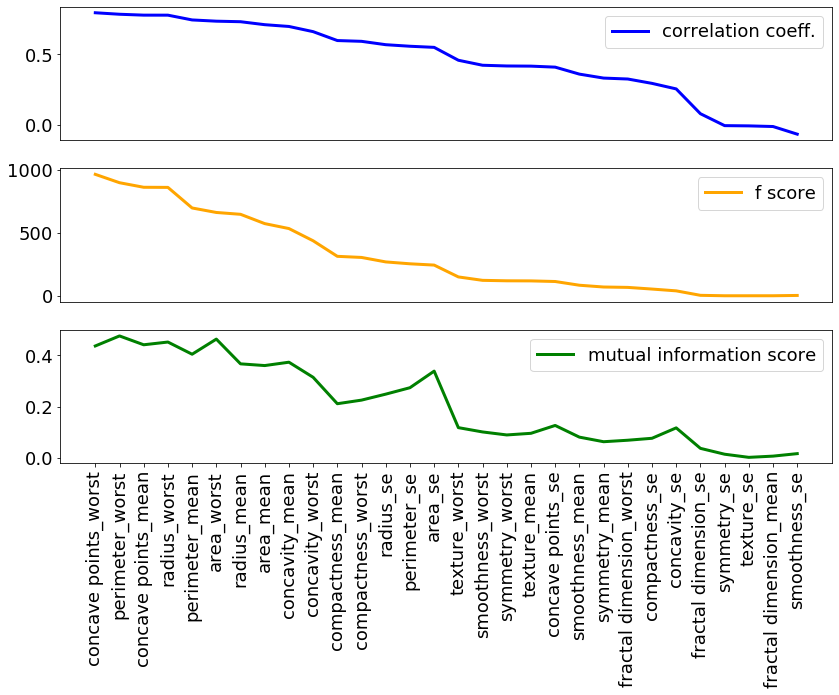

In [18]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,10))


axes[0].plot(cm_order['diagnosis'][1:],color = "blue",label="correlation coeff.",linewidth = 3.0)
axes[0].set_xticks([])
axes[0].legend()

axes[1].plot(f_inorder.iloc[0],color = "orange",label="f score",linewidth=3.0)
axes[1].set_xticks([])
axes[1].legend()

axes[2].plot(mi_inorder.iloc[0],color = "green",label="mutual information score",linewidth=3.0)
axes[2].legend()


plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/score_trend.png',dpi=150)
plt.show()

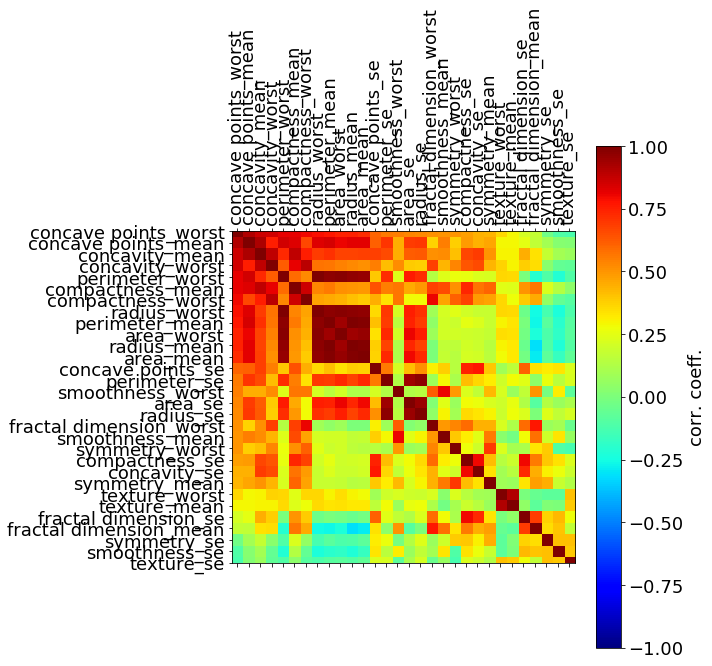

In [19]:
wdbc_X = wdbc.drop(["diagnosis"],axis=1)
corrmat_X = wdbc_X.corr()

all_cols = corrmat_X.sort_values('concave points_worst',ascending=False)['concave points_worst'].index 
cols = all_cols

cm = corrmat_X.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='jet',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
# plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
plt.show()

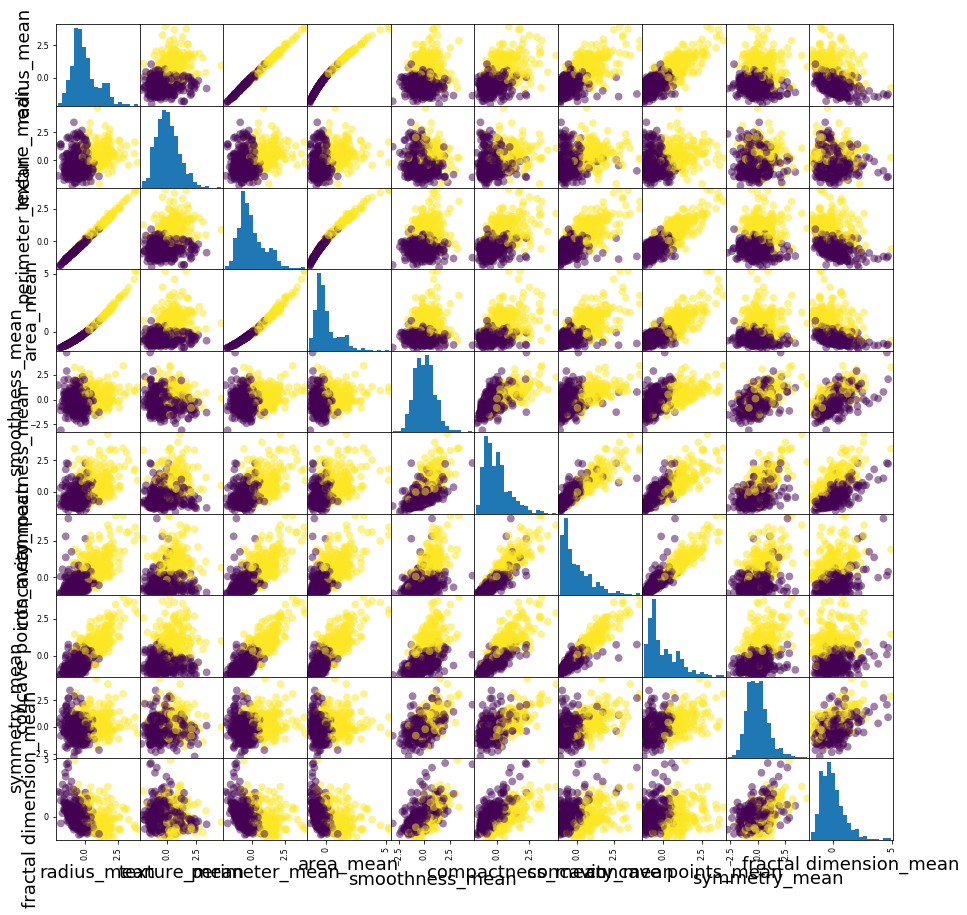

In [20]:
pd.plotting.scatter_matrix(wdbc_X.iloc[:,0:10], c = wdbc_Y, 
                           figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=0.5)
plt.show()

In [21]:
# import pandas as pd
# import scipy.cluster.hierarchy as spc

# corr = corrmat_X.values

# pdist = spc.distance.pdist(corr)
# linkage = spc.linkage(pdist, method='complete')
# idx = spc.fcluster(linkage, 0.6*pdist.max(), 'distance')
# # corr_reorder = 

In [ ]:
# corrmat_X1 = corrmat_X.copy()
# corrmat_X1["cluster"] = idx
# all_cols = corrmat_X1.sort_values('cluster',ascending=True)['cluster'].index 
# cols = all_cols
# cm = corrmat_X.loc[cols,cols]
# plt.figure(figsize=(10,10))
# plt.matshow(cm,vmin=-1,vmax=1,cmap='jet',fignum=0)
# plt.colorbar(label='corr. coeff.')
# plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
# plt.yticks(np.arange(cm.shape[0]),list(cols))
# plt.tight_layout()
# # plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
# plt.show()

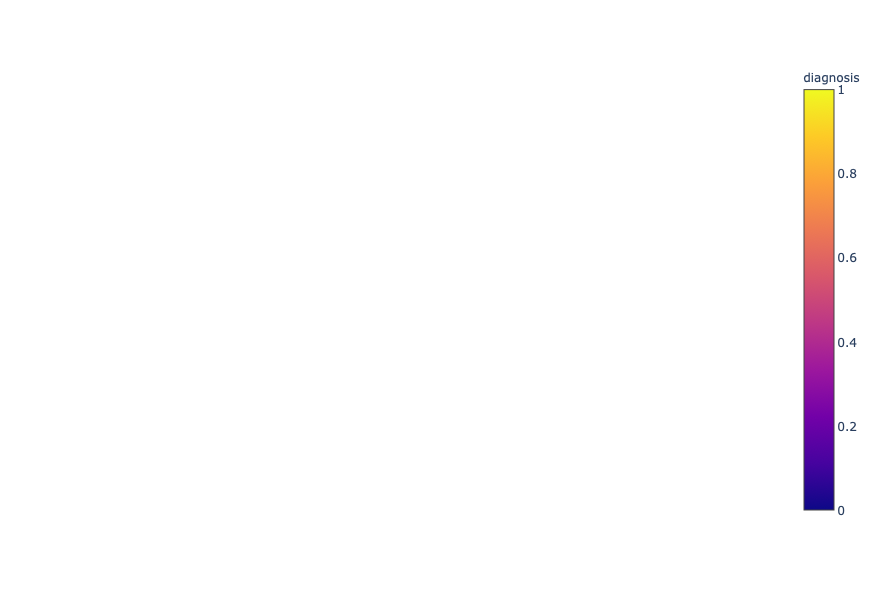

In [22]:
import plotly.express as px
fig = px.scatter_3d(wdbc, x='concave points_worst', y='perimeter_worst', z='concave points_mean',
              color='diagnosis', opacity=0.5)
fig.show()

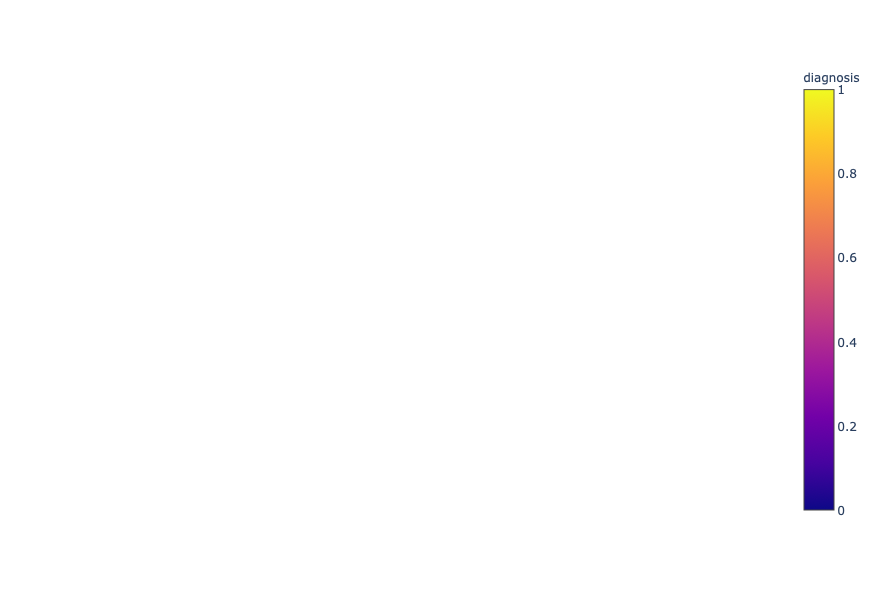

In [23]:
import plotly.express as px
fig = px.scatter_3d(wdbc, x='smoothness_se', y='texture_se', z='fractal dimension_mean',
              color='diagnosis', opacity=0.5)
fig.show()

In [ ]:
##############################################################
##############################################################
##############################################################
##############################################################
##############################################################

## Different models accuracy and sensitivity analysis

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
import pickle

### Pipeline

In [38]:
# Label target variable
leb = LabelEncoder()
wdbc[["diagnosis"]] = leb.fit_transform(wdbc["diagnosis"])
display(wdbc.head())

features = ['radius_mean','texture_mean','perimeter_mean','area_mean',
'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
 'symmetry_mean','fractal dimension_mean','radius_se','texture_se','perimeter_se',
'area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
'symmetry_se','fractal dimension_se','radius_worst','texture_worst','perimeter_worst',
'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal dimension_worst']
X = wdbc[features]
y = wdbc['diagnosis']

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [39]:
random_state = 123456
n_folds = 5
def ML_pipeline_kfold_GridSearchCV(X,y,features, random_state,n_folds, model, param_grid, cm_dict, wrong_index):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify = y)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('num', numeric_transformer, features)])
    
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True, n_jobs = -1)
    grid.fit(X_other, y_other)
    
    y_pred = grid.predict(X_test)
    
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
#     DR = cm[1,1] / (cm[1,0] + cm[1,1])
#     FAR = cm[0,1] / (cm[0,0] + cm[0,1])
#     MIR = 1 - DR
#     TNR = 1 - FAR

    DR = cm[1,1]
    FAR = cm[0,1]
    MIR = cm[1,0]
    TNR = cm[0,0]
    cm_dict["Detection Rate"] += DR
    cm_dict["False Alarm Rate"] += FAR
    cm_dict["Miss Rate"] += MIR
    cm_dict["True Negative Rate"] += TNR
    
    # display(pd.DataFrame(y_test))
    #### wrong index
    i = 0
    for index, a in list(pd.DataFrame(y_test).iterrows()):
        if a['diagnosis'] != y_pred[i]:
            wrong_index.append(index)
        i += 1
    
    return grid, grid.score(X_test, y_test)

In [40]:
# cm_logistic = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}

# # LOGISTIC REGRESSION
# model = LogisticRegression(penalty='l1',solver='saga',max_iter = 10000, multi_class='auto')
# param_grid = {'classifier__C': 1/np.logspace(-4,4,num=20)}
# best_model, best_test_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_logistic)
# # display(pd.DataFrame(best_model.cv_results_))
# best_test_score

### Logistics Regression

In [116]:
model = LogisticRegression(penalty='l1',solver='saga',max_iter = 10000, multi_class='auto')
param_grid = {'classifier__C': 1/np.logspace(-4,4,num=20)}
random_state_list = [1010, 1030, 1050, 2020, 2040, 2050, 2080, 1234, 2345, 3456]

test_score_list = []
alpha_list = []
c_list = []
per_list = []

wrong_index_logistic = []
cm_logistic = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_logistic, wrong_index_logistic)
    results = pd.DataFrame(best_model.cv_results_)
    # check parameter edge
    per_par = (np.argmax(results['mean_test_score'])+1)/results.shape[0]
    per_list.append(per_par)
    c = best_model.best_params_['classifier__C']
    c_list.append(c)
    alpha_list.append(1/c)
    test_score_list.append(best_score)


#### Confusion matrix function

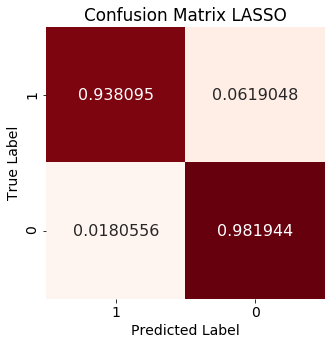

1         0
1  0.938095  0.061905
0  0.018056  0.981944

In [132]:
def calculate_confusion(cm, name): # function for drawing and calculating confusion matrix
    total = sum(cm_logistic.values())
    
    cm_df = pd.DataFrame([[cm["Detection Rate"]/(cm["Detection Rate"]+cm["Miss Rate"]),cm["Miss Rate"]/(cm["Detection Rate"]+cm["Miss Rate"])],
                          [cm["False Alarm Rate"]/(cm["False Alarm Rate"]+cm["True Negative Rate"]), cm["True Negative Rate"]/(cm["False Alarm Rate"]+cm["True Negative Rate"])]],
                         index=[1, 0], columns = [1, 0])
    
    plt.figure(figsize = (5,5))
    plt.title(f"Confusion Matrix {name}")
    sn.heatmap(cm_df, annot=True, fmt='g', cbar=False, 
               annot_kws={"size": 16}, cmap="Reds")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig(f'figures/Confusion Matrix {name}.png',dpi=100)
    plt.show()
    return cm_df


cm_df_logistic = calculate_confusion(cm_logistic, "LASSO")
cm_df_logistic

In [43]:
# Logistic regression result
## The test score result and parameter: alpha
test_result_log = pd.DataFrame({"c": c_list,"Alpha":alpha_list, "Test Score": test_score_list, "Parameter percentile":per_list})

display(test_result_log)


# mean and std of 10 test scores
score_mean_log = np.mean(test_score_list)
score_std_log = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_log, "\n Test accuracy std: ", score_std_log)

c     Alpha  Test Score  Parameter percentile
0  1.623777  0.615848    0.964912                  0.50
1  0.233572  4.281332    0.947368                  0.60
2  0.233572  4.281332    0.991228                  0.60
3  0.615848  1.623777    0.956140                  0.55
4  0.233572  4.281332    0.947368                  0.60
5  0.615848  1.623777    0.982456                  0.55
6  0.615848  1.623777    0.982456                  0.55
7  1.623777  0.615848    0.938596                  0.50
8  0.615848  1.623777    0.982456                  0.55
9  4.281332  0.233572    0.964912                  0.45

Mean of test accuracy score:  0.9657894736842104 
 Test accuracy std:  0.017300949932733338


#### LASSO Global feature importance

In [106]:
from sklearn.linear_model import LogisticRegression
def ML_pipeline_kfold_LR2(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = []
    cont_ftrs = ['radius_mean','texture_mean','perimeter_mean','area_mean',
                'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                 'symmetry_mean','fractal dimension_mean','radius_se','texture_se','perimeter_se',
                'area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                'symmetry_se','fractal dimension_se','radius_worst','texture_worst','perimeter_worst',
                'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                'symmetry_worst','fractal dimension_worst']
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs)])
    final_scaler = StandardScaler()
    pipe = make_pipeline(preprocessor,final_scaler,LogisticRegression(penalty='l2',solver='lbfgs'))
    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': 1/np.logspace(-4,4,num=20)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs
    return grid, np.array(feature_names), X_test, y_test

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0425s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  80 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  56 out of  80 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.5s finished


test score: 0.9824561403508771


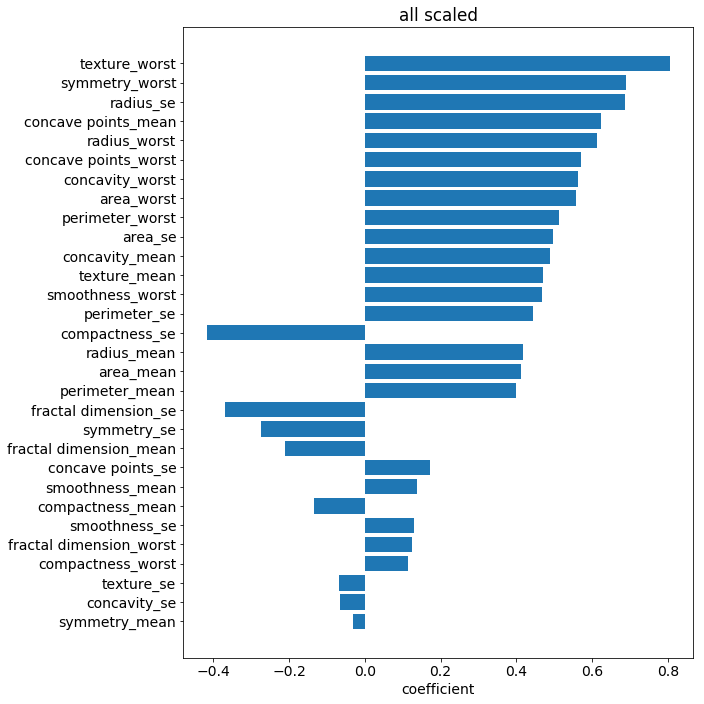

In [114]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold_LR2(X,y,42,4)
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_.named_steps['logisticregression'].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(30),coefs[sorted_indcs[-30:]])
plt.yticks(np.arange(30),feature_names[sorted_indcs[-30:]])
plt.xlabel('coefficient')
plt.title('all scaled')
plt.tight_layout()
plt.savefig('figures/LR_coefs_scaled.png',dpi=300)
plt.show()

In [121]:
# Save Result
best_model = grid.best_estimator_.named_steps['classifier']
model_sav = LogisticRegression(penalty='l1',solver='saga',max_iter = 10000, multi_class='auto')
pickle.dump(best_model, open("lasso_logistic.sav", 'wb'))

### Random Forest

In [122]:
# RANDOM FOREST
model = RandomForestClassifier(n_estimators = 300, random_state=123456789)
hyper_para = [[2,3,4,5,6,8,10,12],[1,3,5,7,9,11,13,18,20,25,30]]
param_grid = {'classifier__max_depth':hyper_para[0],"classifier__max_features":hyper_para[1]}

random_state_list = [1010, 1030, 1050, 2020, 2040, 2050, 2080, 1234, 2345, 3456]

test_score_list = []
maxfea_list = []
maxdepth_list = []
per_list = []

wrong_index_rf = []
cm_rf = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_rf, wrong_index_rf)
    results = pd.DataFrame(best_model.cv_results_)
    
    maxdep = best_model.best_params_['classifier__max_depth']
    maxfea = best_model.best_params_['classifier__max_features']
    
    # check parameter edge
    maxdep_position = (hyper_para[0].index(maxdep)+1)/len(hyper_para[0])
    maxfea_position = (hyper_para[1].index(maxfea)+1)/len(hyper_para[1])
    
    per_list.append((maxdep_position,maxfea_position))
    maxfea_list.append(maxfea)
    maxdepth_list.append(maxdep)
    test_score_list.append(best_score)
    

In [46]:
# Random Forest result
test_result_rf = pd.DataFrame({"best max depth": maxdepth_list,"best max feature":maxfea_list, "Test Score": test_score_list, "Parameter percentile":per_list})
display(test_result_rf)

# mean and std of 10 test scores
score_mean_rf = np.mean(test_score_list)
score_std_rf = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_rf, "\n Test accuracy std: ", score_std_rf)

best max depth  best max feature  Test Score          Parameter percentile
0               6                 9    0.903509  (0.625, 0.45454545454545453)
1               4                 9    0.929825  (0.375, 0.45454545454545453)
2              12                 1    0.938596    (1.0, 0.09090909090909091)
3               5                11    0.929825     (0.5, 0.5454545454545454)
4               4                 5    0.938596   (0.375, 0.2727272727272727)
5               8                 7    0.964912   (0.75, 0.36363636363636365)
6               8                 9    0.964912   (0.75, 0.45454545454545453)
7               6                 3    0.964912  (0.625, 0.18181818181818182)
8               8                18    0.991228    (0.75, 0.7272727272727273)
9               8                 5    0.991228    (0.75, 0.2727272727272727)

Mean of test accuracy score:  0.9517543859649124 
 Test accuracy std:  0.02696565991041998


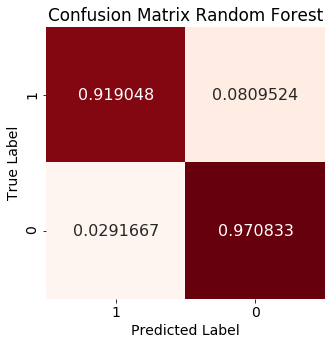

1         0
1  0.919048  0.080952
0  0.029167  0.970833

In [136]:
cm_df_rf = calculate_confusion(cm_rf, "Random Forest")
cm_df_rf

In [48]:
best_model.best_estimator_.named_steps['classifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=123456789, verbose=0,
            warm_start=False)

In [50]:
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = 3456,stratify = y)



grid_rf = best_model
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid_rf.best_estimator_.named_steps['classifier'])
# transform the test set
X_test_transformed = grid_rf.best_estimator_.named_steps['preprocessor'].transform(X_test)
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(114, 30)
(2, 114, 30)


In [51]:
index = 5 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 1 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = features)

0.6231868109898642


In [52]:
index = 5 # the index of the point to explain
print(explainer.expected_value[1]) # we explain class 1 predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][index,:], features = X_test_transformed[index,:],feature_names = features)

0.37681318761315197


In [123]:
# Save Result
sav = best_model.best_estimator_.named_steps['classifier']
pickle.dump(sav, open("random forest.sav", 'wb'))

### Support Vector Classifier

In [124]:
from sklearn.svm import SVC

Gl = np.logspace(-5,0,20)
Cl = np.logspace(-3,4,20)
model = SVC(kernel = 'rbf', random_state=random_state, probability = True)
param_grid = {'classifier__gamma':Gl,"classifier__C":Cl}

test_score_list = []
Gamma_list = []
C_list = []
per_list = []


wrong_index_svc = []
cm_svc = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_svc, wrong_index_svc)
    results = pd.DataFrame(best_model.cv_results_)
    
    maxGamma = best_model.best_params_['classifier__gamma']
    maxC = best_model.best_params_['classifier__C']
    
    # check parameter edge
    G_position = (list(Gl).index(maxGamma)+1)/len(Gl)
    C_position = (list(Cl).index(maxC)+1)/len(Cl)
    
    per_list.append((G_position,C_position))
    Gamma_list.append(maxGamma)
    C_list.append(maxC)
    test_score_list.append(best_score)


In [54]:
# SVC result
test_result_svc = pd.DataFrame({"best Gamma": Gamma_list, "best C": C_list, "Test Score": test_score_list, "Parameter percentile":per_list})
display(test_result_svc)

score_mean_svc = np.mean(test_score_list)
score_std_svc = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_svc, "\n Test accuracy std: ", score_std_svc)

best Gamma       best C  Test Score Parameter percentile
0    0.000113  1832.980711    0.964912          (0.25, 0.9)
1    0.004281    11.288379    0.973684          (0.55, 0.6)
2    0.000379   143.844989    0.991228         (0.35, 0.75)
3    0.014384     4.832930    0.956140         (0.65, 0.55)
4    0.000379   143.844989    0.973684         (0.35, 0.75)
5    0.007848     4.832930    0.991228          (0.6, 0.55)
6    0.026367     0.885867    0.964912          (0.7, 0.45)
7    0.000695   784.759970    0.938596          (0.4, 0.85)
8    0.014384     2.069138    0.991228          (0.65, 0.5)
9    0.000379  1832.980711    0.973684          (0.35, 0.9)

Mean of test accuracy score:  0.9719298245614034 
 Test accuracy std:  0.01607921296475732


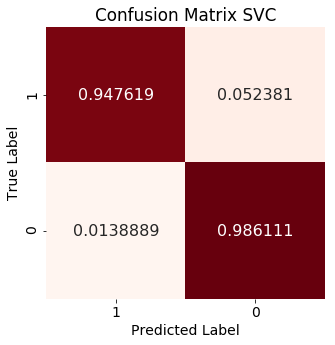

1         0
1  0.947619  0.052381
0  0.013889  0.986111

In [137]:
cm_df_svc = calculate_confusion(cm_svc, "SVC")
cm_df_svc

In [89]:
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = 3456,stratify = y)


# grid_svc = best_model
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.KernelExplainer(grid_svc.best_estimator_.named_steps['classifier'].predict_proba, X_test.iloc[0:25])
# transform the test set
X_test_transformed = grid_svc.best_estimator_.named_steps['preprocessor'].transform(X_test.iloc[0:25])
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(25, 30)



(2, 25, 30)


In [88]:
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = 3456,stratify = y)
y_test[20] 

0

In [90]:
index = 20 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = features)

0.018235873809423552


In [91]:
index = 20 # the index of the point to explain
print(explainer.expected_value[1]) # we explain class 1 predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][index,:], features = X_test_transformed[index,:],feature_names = features)

0.9817641261905764


In [125]:
# Save Result
sav = best_model.best_estimator_.named_steps['classifier']
pickle.dump(sav, open("svc.sav", 'wb'))

### XGBOOST

In [126]:
# XG Boost
import xgboost as xgb


Iterations = [100, 200, 600, 1000]
LearningRate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
Depth = [2, 3, 5, 6, 8, 10]


param_grid = {'classifier__n_estimators':Iterations, 'classifier__learning_rate':LearningRate, 
              'classifier__max_depth':Depth}
model = xgb.XGBClassifier(reg_alpha=0.01)

test_score_list = []
Iteration_list = []
LR_list = []
Dep_list = []
per_list = []

wrong_index_xgb = []
cm_xgb = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_xgb, wrong_index_xgb)
    results = pd.DataFrame(best_model.cv_results_)
    
    maxIte = best_model.best_params_['classifier__n_estimators']
    maxLR = best_model.best_params_['classifier__learning_rate']
    maxDep = best_model.best_params_['classifier__max_depth']
    
    # check parameter edge
    Ite_position = (list(Iterations).index(maxIte)+1)/len(Iterations)
    LR_position = (list(LearningRate).index(maxLR)+1)/len(LearningRate)
    Dep_position = (list(Depth).index(maxDep)+1)/len(Depth)
    
    per_list.append((Ite_position,LR_position,Dep_position))
    Iteration_list.append(maxIte)
    LR_list.append(maxLR)
    Dep_list.append(maxDep)
    test_score_list.append(best_score)

In [60]:
# XGboost result

test_result_xgb = pd.DataFrame({"best n_estimators": Iteration_list, "best Learning rate": LR_list,"Best Depth": Dep_list,
                            "Test Score": test_score_list, "Parameter percentile":per_list})
display(test_result_xgb)

score_mean_xgb = np.mean(test_score_list)
score_std_xgb = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_xgb, "\n Test accuracy std: ", score_std_xgb)

best n_estimators  best Learning rate  Best Depth  Test Score  \
0                100                0.50           3    0.938596   
1                100                0.50           3    0.929825   
2                100                0.20           3    0.982456   
3                600                0.10           2    0.956140   
4                600                0.10           2    0.947368   
5                600                0.10           3    0.956140   
6               1000                0.05           2    0.964912   
7                600                0.20           2    0.973684   
8                200                0.05           6    0.991228   
9                600                0.10           2    0.973684   

                              Parameter percentile  
0                  (0.25, 1.0, 0.3333333333333333)  
1                  (0.25, 1.0, 0.3333333333333333)  
2   (0.25, 0.6666666666666666, 0.3333333333333333)  
3                 (0.75, 0.5, 0.16666666666666666)  
4                 (0.75, 0.5, 0.16666666666666666)  
5                  (0.75, 0.5, 0.3333333333333333)  
6   (1.0, 0.3333333333333333, 0.16666666666666666)  
7  (0.75, 0.6666666666666666, 0.16666666666666666)  
8    (0.5, 0.3333333333333333, 0.6666666666666666)  
9                 (0.75, 0.5, 0.16666666666666666)

Mean of test accuracy score:  0.9614035087719298 
 Test accuracy std:  0.018483603075180238


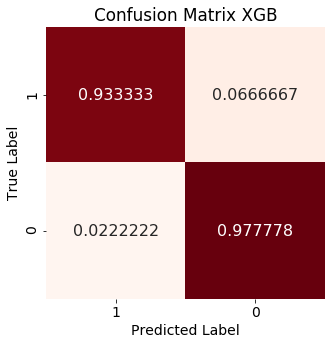

1         0
1  0.933333  0.066667
0  0.022222  0.977778

In [138]:
cm_df_xgb = calculate_confusion(cm_xgb, "XGB")
cm_df_xgb

In [261]:
# display(pd.DataFrame(best_model.cv_results_))

In [95]:
Iterations = [100, 200, 600, 1000]
LearningRate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
Depth = [2, 3, 5, 6, 8, 10]


param_grid = {'classifier__n_estimators':Iterations, 'classifier__learning_rate':LearningRate, 
              'classifier__max_depth':Depth}
model = xgb.XGBClassifier(reg_alpha=0.01)

test_score_list = []
Iteration_list = []
LR_list = []
Dep_list = []
per_list = []

wrong_index_xgb = []
cm_xgb = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,3456,n_folds, model, param_grid, cm_xgb, wrong_index_xgb)

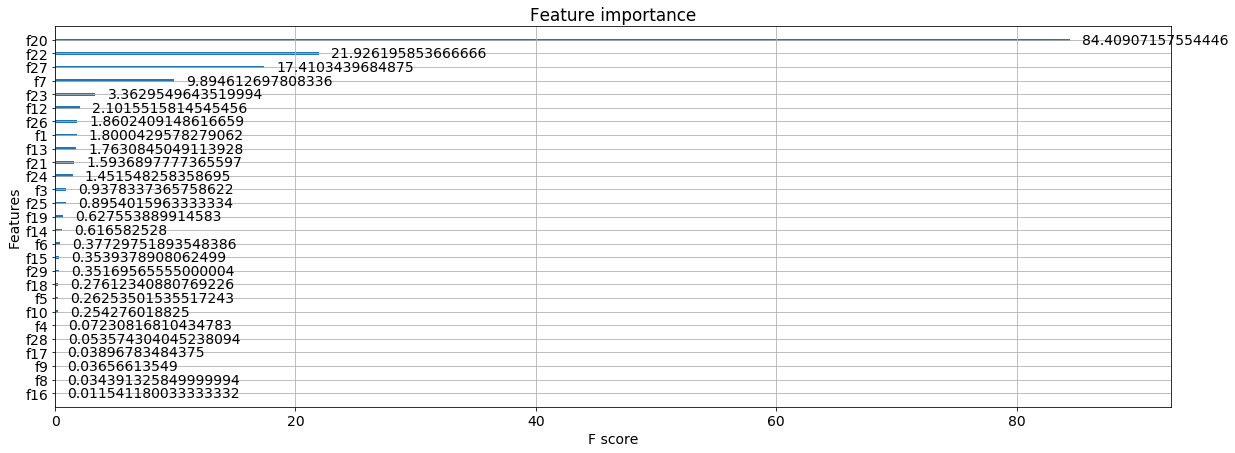

In [101]:
a = xgb.plot_importance(best_model.best_estimator_.named_steps['classifier'], importance_type='gain')
fig = a.figure
fig.set_size_inches(20, 7)
plt.savefig('figures/XGB Global Feature importance',dpi=300)

In [127]:
# Save Result
sav = best_model.best_estimator_.named_steps['classifier']
pickle.dump(sav, open("xgboost.sav", 'wb'))

### CATBOOST

In [141]:
import catboost

model = catboost.CatBoostClassifier(logging_level='Silent')
# Iterations = [500]
# LearningRate = [0.05, 0.1]
# Depth = [3,5]

Iterations = [700]
LearningRate = [0.05]
Depth = [6]

param_grid = {'classifier__iterations':Iterations, 'classifier__learning_rate':LearningRate, 
              'classifier__depth':Depth}

test_score_list = []
Iteration_list = []
LR_list = []
Dep_list = []
per_list = []

wrong_index_cat = []
cm_cat = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_cat, wrong_index_cat)
    results = pd.DataFrame(best_model.cv_results_)
    
    maxIte = best_model.best_params_['classifier__iterations']
    maxLR = best_model.best_params_['classifier__learning_rate']
    maxDep = best_model.best_params_['classifier__depth']
    
    # check parameter edge
    Ite_position = (list(Iterations).index(maxIte)+1)/len(Iterations)
    LR_position = (list(LearningRate).index(maxLR)+1)/len(LearningRate)
    Dep_position = (list(Depth).index(maxDep)+1)/len(Depth)
    
    per_list.append((Ite_position,LR_position,Dep_position))
    Iteration_list.append(maxIte)
    LR_list.append(maxLR)
    Dep_list.append(maxDep)
    test_score_list.append(best_score)

In [142]:
# Catboost result
test_result = pd.DataFrame({"best iterations": Iteration_list, "best Learning rate": LR_list,"Best Depth": Dep_list,
                            "Test Score": test_score_list, "Parameter percentile":per_list})
display(test_result)

score_mean_cat = np.mean(test_score_list)
score_std_cat = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_cat, "\n Test accuracy std: ", score_std_cat)

best iterations  best Learning rate  Best Depth  Test Score  \
0              700                0.05           6    0.964912   
1              700                0.05           6    0.947368   
2              700                0.05           6    0.982456   
3              700                0.05           6    0.947368   
4              700                0.05           6    0.956140   
5              700                0.05           6    0.982456   
6              700                0.05           6    0.973684   
7              700                0.05           6    0.973684   
8              700                0.05           6    0.982456   
9              700                0.05           6    0.991228   

  Parameter percentile  
0      (1.0, 1.0, 1.0)  
1      (1.0, 1.0, 1.0)  
2      (1.0, 1.0, 1.0)  
3      (1.0, 1.0, 1.0)  
4      (1.0, 1.0, 1.0)  
5      (1.0, 1.0, 1.0)  
6      (1.0, 1.0, 1.0)  
7      (1.0, 1.0, 1.0)  
8      (1.0, 1.0, 1.0)  
9      (1.0, 1.0, 1.0)

Mean of test accuracy score:  0.9701754385964912 
 Test accuracy std:  0.014782718900309404


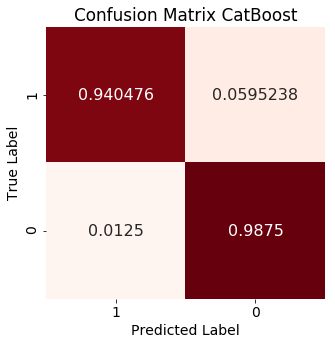

1         0
1  0.940476  0.059524
0  0.012500  0.987500

In [143]:
cm_df_cat = calculate_confusion(cm_cat, "CatBoost")
cm_df_cat

In [94]:
best_model.best_estimator_.named_steps['classifier'].get_object_importance

<bound method CatBoost.get_object_importance of <catboost.core.CatBoostClassifier object at 0x1c24979f98>>

### Naive Bayes

In [128]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
param_grid = {}

test_score_list = []
wrong_index_nb = []
cm_nb = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_test_score = ML_pipeline_kfold_GridSearchCV(X,y,features,random_state,n_folds, model, param_grid, cm_nb, wrong_index_nb)
    test_score_list.append(best_test_score)
    

In [63]:
test_result_nb = pd.DataFrame({"Test Score": test_score_list})
display(test_result_nb)
score_mean_nb = np.mean(test_score_list)
score_std_nb = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_nb, "\n Test accuracy std: ", score_std_nb)

Test Score
0    0.912281
1    0.929825
2    0.938596
3    0.929825
4    0.912281
5    0.938596
6    0.929825
7    0.956140
8    0.938596
9    0.956140

Mean of test accuracy score:  0.9342105263157896 
 Test accuracy std:  0.014279667189561158


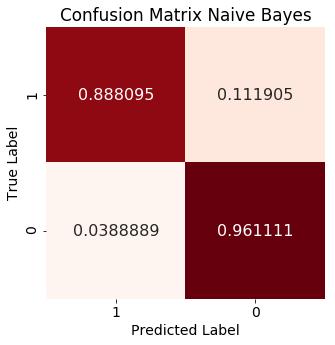

1         0
1  0.888095  0.111905
0  0.038889  0.961111

In [140]:
cm_df_nb = calculate_confusion(cm_nb, "Naive Bayes")
cm_df_nb

In [129]:
# Save Result
sav = best_model.best_estimator_.named_steps['classifier']
pickle.dump(sav, open("naivebayes.sav", 'wb'))

### Result Plot

In [65]:
mean_score = [score_mean_log, score_mean_rf, score_mean_svc, score_mean_xgb, score_mean_cat, score_mean_nb]
std_score = [score_std_log, score_std_rf, score_std_svc, score_std_xgb, score_std_cat, score_std_nb]

matrices = [cm_df_logistic, cm_df_rf, cm_df_svc, cm_df_xgb, cm_df_cat, cm_df_nb]

DR_list = []
FAR_list = []
MIR_list = []
TNR_list = []
for matrix in matrices:
    DR_list.append(matrix.iloc[0,0])
    FAR_list.append(matrix.iloc[1,0])
    MIR_list.append(matrix.iloc[0,1])
    TNR_list.append(matrix.iloc[1,1])

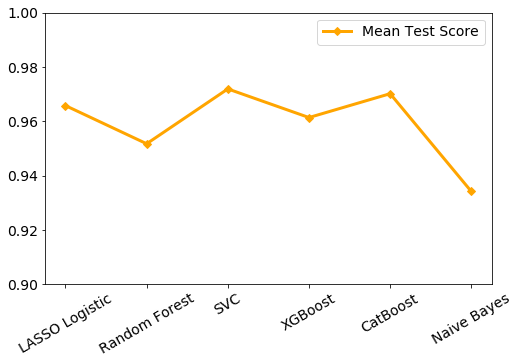

In [144]:
name_list = ["LASSO Logistic", "Random Forest", "SVC", "XGBoost", "CatBoost", "Naive Bayes"]

# Mean
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,5))
plt.plot(name_list, mean_score, color = "orange",label="Mean Test Score",linewidth=3.0, marker = 'D')
plt.xticks(rotation=30)
plt.ylim(0.9, 1)
plt.legend()
plt.savefig('figures/test_score_models.png',dpi=300)
plt.show()

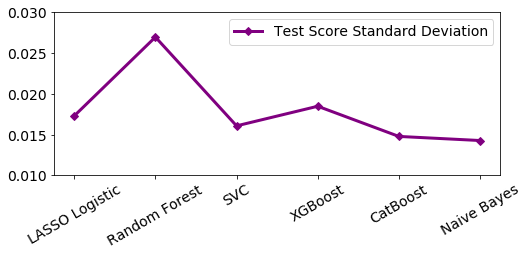

In [79]:
# STD
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,std_score, color = "purple",label="Test Score Standard Deviation",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.ylim(0.01, 0.03)
plt.legend()
plt.savefig('figures/standard_deviation_models.png',dpi=300)
plt.show()

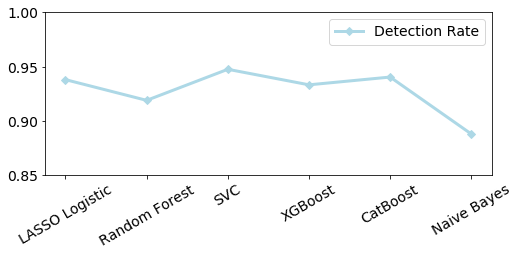

In [78]:
# Detection Rate
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,DR_list, color = "lightblue",label="Detection Rate",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.ylim(0.85, 1)
plt.legend()
plt.savefig('figures/DR_models.png',dpi=300)
plt.show()

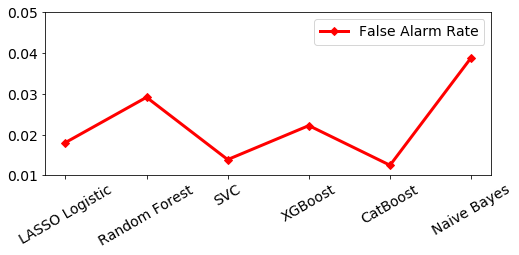

In [77]:
# FAR
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,FAR_list, color = "red",label="False Alarm Rate",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.ylim(0.01, 0.05)
plt.legend()
plt.savefig('figures/FAR_models.png',dpi=300)
plt.show()

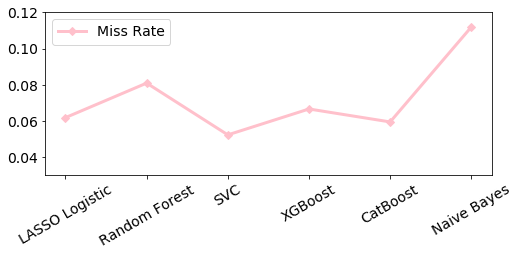

In [76]:
# MIR
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,MIR_list, color = "pink",label="Miss Rate",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.ylim(0.03, 0.12)
plt.legend()
plt.savefig('figures/FAR_models.png',dpi=300)
plt.show()

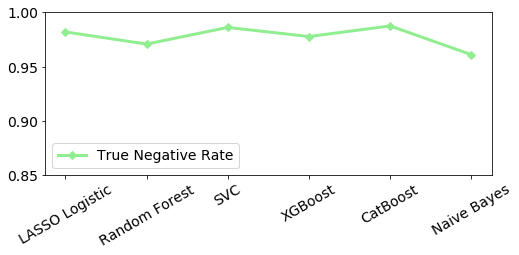

In [75]:
# TNR
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,TNR_list, color = "lightgreen",label="True Negative Rate",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.ylim(0.85, 1)
plt.legend()
plt.savefig('figures/TNR_models.png',dpi=300)
plt.show()

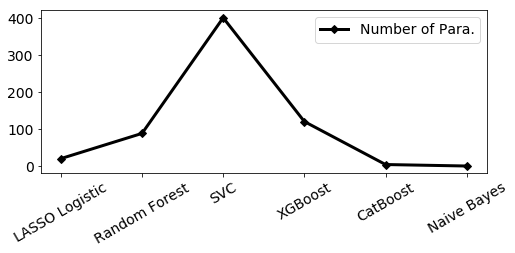

In [72]:
# Number of Parameter tuned
tune_list = [20, 88, 400, 120, 4, 0]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,3))
plt.plot(name_list,tune_list, color = "black",label="Number of Para.",linewidth=3.0, marker = "D")
plt.xticks(rotation=30)
plt.legend()
plt.savefig('figures/number_para_models.png',dpi=300)
plt.show()

In [73]:
X1 = X[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 
        'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
        'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']]
y1 = y

features1 = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 
        'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
        'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']

In [74]:
import catboost

model = catboost.CatBoostClassifier()
Iterations = [500, 800]
LearningRate = [0.01]
Depth = [2,5,8]

param_grid = {'classifier__iterations':Iterations, 'classifier__learning_rate':LearningRate, 
              'classifier__depth':Depth}

test_score_list = []
Iteration_list = []
LR_list = []
Dep_list = []
per_list = []

wrong_index_cat = []
cm_cat = {"Detection Rate":0, "False Alarm Rate":0, "Miss Rate":0, "True Negative Rate":0}
for random_state in random_state_list[0:10]:
    best_model, best_score = ML_pipeline_kfold_GridSearchCV(X1,y1,features1,random_state,n_folds, model, param_grid, cm_cat, wrong_index_cat)
    results = pd.DataFrame(best_model.cv_results_)
    
    maxIte = best_model.best_params_['classifier__iterations']
    maxLR = best_model.best_params_['classifier__learning_rate']
    maxDep = best_model.best_params_['classifier__depth']
    
    # check parameter edge
    Ite_position = (list(Iterations).index(maxIte)+1)/len(Iterations)
    LR_position = (list(LearningRate).index(maxLR)+1)/len(LearningRate)
    Dep_position = (list(Depth).index(maxDep)+1)/len(Depth)
    
    per_list.append((Ite_position,LR_position,Dep_position))
    Iteration_list.append(maxIte)
    LR_list.append(maxLR)
    Dep_list.append(maxDep)
    test_score_list.append(best_score)

KeyboardInterrupt: 

In [ ]:
# Catboost result
test_result = pd.DataFrame({"best iterations": Iteration_list, "best Learning rate": LR_list,"Best Depth": Dep_list,
                            "Test Score": test_score_list, "Parameter percentile":per_list})
display(test_result)

score_mean_cat1 = np.mean(test_score_list)
score_std_cat1 = np.std(test_score_list)
print("Mean of test accuracy score: ", score_mean_cat1, "\n Test accuracy std: ", score_std_cat1)

In [ ]:

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify = y)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
DR = cm[1,1] / (cm[1,0] + cm[1,1])
FAR = cm[0,1] / (cm[0,0] + cm[0,1])
MIR = 1 - DR
TNR = 1 - FAR
cm